In [1]:
import numpy as np
import pandas as pd


In [2]:
#our dataset is not encoded in utf-8 , so used 'encoding = 'latin-1''
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
#taking a look at 5 random rows
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1709,ham,U meet other fren dun wan meet me ah... Muz b ...,NaN,NaN,NaN
2815,ham,Genius what's up. How your brother. Pls send h...,NaN,NaN,NaN
4583,ham,Noooooooo please. Last thing I need is stress....,NaN,NaN,NaN
746,ham,"I promise to take good care of you, princess. ...",NaN,NaN,NaN
3451,ham,Ugh just got outta class,NaN,NaN,NaN


In [4]:
#checking the shape of our data
df.shape

(5572, 5)

In [5]:
# We will follow the structure :
# 1. Data Cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deployement

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Out of total 5572 values, more than 90% of the values in Col 2,3,4 are Null, so we will remove them.

In [7]:
# Dropping the last 3 coloumns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
2655,ham,Great! I have to run now so ttyl!
2341,ham,Tell dear what happen to you. Why you talking ...
4198,spam,"cmon babe, make me horny, *turn* me on! Txt me..."
933,ham,What time you think you'll have it? Need to kn...
419,spam,Send a logo 2 ur lover - 2 names joined by a h...


In [8]:
# Instead of v1 and v2 , we will rename the columns for a better understanding
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4355,ham,Great. So should i send you my account number.
3366,ham,Hey what are you doing. Y no reply pa..
4243,ham,"Aight, I'm chillin in a friend's room so text ..."
1242,ham,Nobody can decide where to eat and dad wants C...
4572,spam,\URGENT! This is the 2nd attempt to contact U!...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
# We will assign numerical values to our 'target' column , spam ==1 and ham == 0.
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

No missing values found.


In [12]:
# Checking for duplicate values
df.duplicated().sum()

403

In [13]:
# 403 duplicate values found, dropping the duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [14]:
#No duplicate values remaining.
df.shape

## with this we have finished the cleaning of the data.

(5169, 2)

## 2. Exploratory Data Analysis

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Checking the count of sms that are ham and spam respectively. (ham==0)(spam==1)
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [17]:
import matplotlib.pyplot as plt

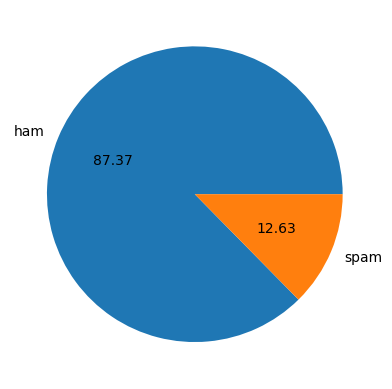

In [18]:
# Making a piechart to see the value count
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

We can see here that the data is imbalanced.

In [19]:
# For a deeper understanding of data , we will create 3 new coloumns
# 1. No. of characters in the sms
# 2. No. of words in the sms
# 3. No. of sentences in the sms.

# We will use the Natural Language Toolkit library for it.
!pip install nltk

In [20]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Abhishek
[nltk_data]     Godiyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Abhishek
[nltk_data]     Godiyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abhishek
[nltk_data]     Godiyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
#Getting the number of characters in each sms
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#Getting the number of words in each sms
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

We are getting the words in each sms , for the no. of words simply use len function.

In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# Getting the number of sentences in each sms.
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

We are getting the sentences in each sms , for the no. of sentences simply use len function.

In [26]:
df['num_sentences'] =  df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#We can check the data for ham and spam seperately
#Ham
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#Data for Spam
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


We can observe that the mean(chars,words,sentences) for spam > ham.

In [30]:
# We can plot a histogram for both spam and ham
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

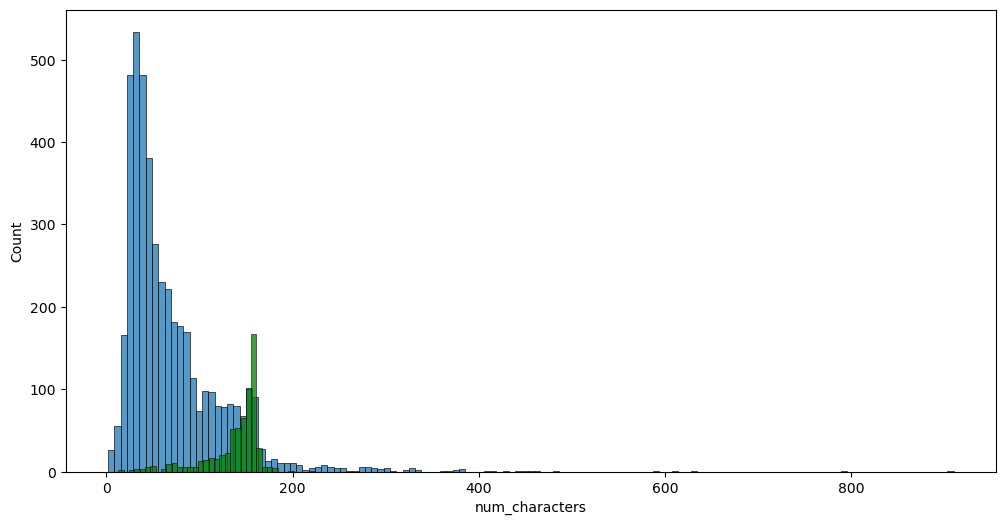

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='green')

We can observe here too , that most of the ham messages have less no. of characters in them.

<Axes: >

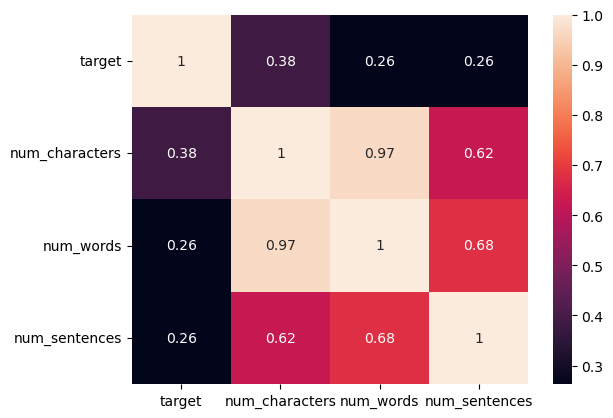

In [32]:
# Let us see the correlation between each numeric data colm
sns.heatmap(df.corr(numeric_only=True),annot=True)

We can observe that the target has a corr coefficient of 0.38 with num_characters.                     
We also see that num_sentences & num_words depend on num_characters , so while training the model we will only take num_characters.

## 3. Preproccessing the Data
Lower case                                                                                                                                           
Tokenization                                                                                                                                       
Removing special characters                                                                                                                              
Removing stop words and punctuation                                                                                                               
Stemming                                                                                                                                                

In [33]:
#Stopwords are words that are part of sentence formation and dont contribute much to the meaning.
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [34]:
#We will also import a library to get the punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
#Importing libraries for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [36]:
# We will create a function to do all the data preprocessing actions
def text_transform(text):
    #converting to lower case
    text = text.lower() 
    
    #tokenizing --> breaking into words
    text = nltk.word_tokenize(text)
    
    #removing special characters (eg- @,%)
    y = []
    for char in text:
        if char.isalnum():
            y.append(char)

    text = y[:]
    y.clear()

    #removing stop words and punctuations
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)

    text=y[:]
    y.clear()
    
    #stemming
    for word in text:
        y.append(ps.stem(word))

    return " ".join(y)

In [37]:
#We will pre process one of the messages 
text_transform("I love watching anime's like HunterXHunter and AttackonTitan , you will 100% like them")

'love watch anim like hunterxhunt attackontitan 100 like'

In [38]:
# Now we transform all of the text 
df['transformed_text'] = df['text'].apply(text_transform)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
!pip install wordcloud

In [40]:
# we will generate wordcloud for the spam and ham messages --> wordcloud highlights the important words
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
# Spam WordCloud
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

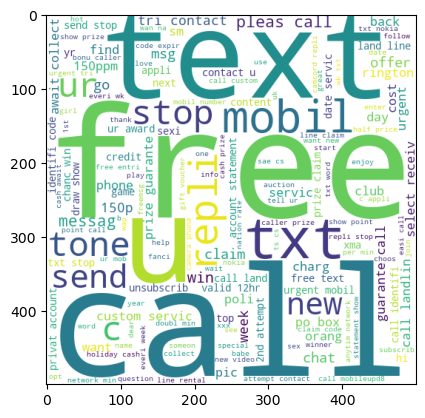

In [42]:
plt.imshow(spam_wc)

The words shown in the above wordcloud are the ones which are usually present in spam sms -- 'free'

In [43]:
# Ham WordCloud
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

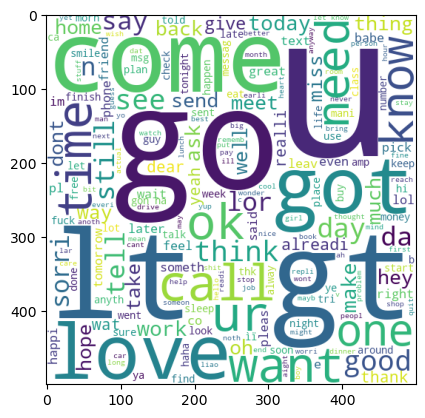

In [44]:
plt.imshow(ham_wc)

We can see that the above words are the usually present in our non-spam/ham sms's

In [45]:
# We will now check the top 25 words for both spam and ham messages.

#This gives us all the spam messages in form of a list.
#df[df['target']==1]['transformed_text'].tolist()

#now we will try to get words from each sms and store them
spam_sms_words = []
for sms in df[df['target']==1]['transformed_text'].tolist():
    for word in sms.split():
        spam_sms_words.append(word)

# the no. words in spam sms's = len
len(spam_sms_words)

9939

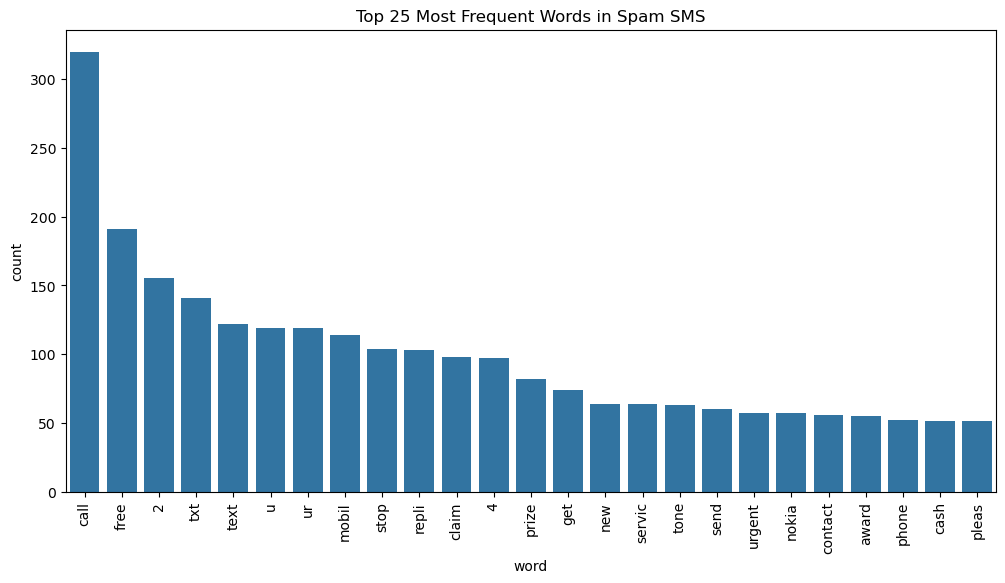

In [46]:
# Now we will count the frequency of each word and get the top 25 words
from collections import Counter

# Getting the top 25 words
word_counts = Counter(spam_sms_words).most_common(25)

# Converting it to a DataFrame
df_counts = pd.DataFrame(word_counts, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_counts)
plt.xticks(rotation='vertical')
plt.title('Top 25 Most Frequent Words in Spam SMS')
plt.show()

In [47]:
#Similarly we will get the top 25 words for non-spam/Ham sms.

#This gives us all the ham messages in form of a list.
#df[df['target']==0]['transformed_text'].tolist()

#now we will try to get words from each sms and store them
ham_sms_words = []
for sms in df[df['target']==0]['transformed_text'].tolist():
    for word in sms.split():
        ham_sms_words.append(word)

# the no. words in spam sms's = len
len(ham_sms_words)

35404

We can see that the no. of words in ham are very high compared to spam, which can also be interpreted from our previous observation -  skewed data.

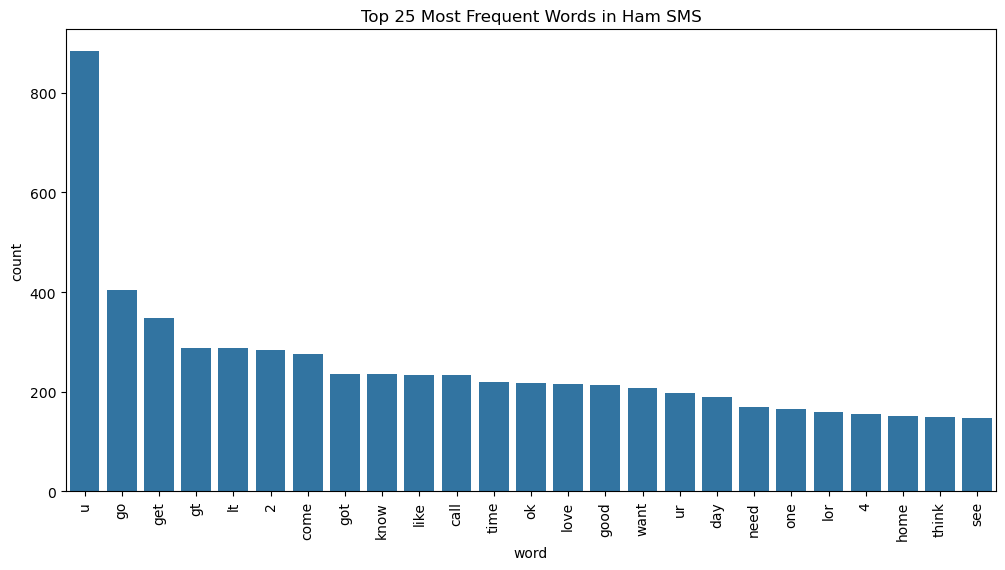

In [48]:
# Now we will count the frequency of each word and get the top 25 words
from collections import Counter

# Getting the top 25 words
word_counts = Counter(ham_sms_words).most_common(25)

# Converting it to a DataFrame
df_counts = pd.DataFrame(word_counts, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_counts)
plt.xticks(rotation='vertical')
plt.title('Top 25 Most Frequent Words in Ham SMS')
plt.show()

# 4. Building the Model

To train our model we need to convert the textual data ('transformed_text') into numerical form.                                                          
We will use two popular vectorization techniques:                                                                                                                   
1.CountVectorizer() --> Converts textual data into a matrix of token counts.     
2.TF-IDF - Weights the terms based on their frequency and importance.    

We will also compare the results after using both the vectorization techniques.


In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [50]:
#Vectorization of our sms's
X1 = cv.fit_transform(df['transformed_text']).toarray() #CountVectorizer()
X2 = tfidf.fit_transform(df['transformed_text']).toarray() #TfidfVectorizer()

In [51]:
X1.shape
#X2 AND X2 have the same shape

(5169, 6708)

In [52]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=2)
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
# ---------- GaussianNB with CountVectorizer ----------
gnb = GaussianNB()
gnb.fit(X1_train, y_train)
y1_pred = gnb.predict(X1_test)

print("===== Results using CountVectorizer =====")
print(f"Accuracy       : {accuracy_score(y_test, y1_pred):.4f}")
print(f"Precision      : {precision_score(y_test, y1_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y1_pred))


# ---------- GaussianNB with TfidfVectorizer ----------
gnb.fit(X2_train, y_train)
y2_pred = gnb.predict(X2_test)

print("\n===== Results using TfidfVectorizer =====")
print(f"Accuracy       : {accuracy_score(y_test, y2_pred):.4f}")
print(f"Precision      : {precision_score(y_test, y2_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y2_pred))

===== Results using CountVectorizer =====
Accuracy       : 0.8801
Precision      : 0.5315
Confusion Matrix:
[[792 104]
 [ 20 118]]

===== Results using TfidfVectorizer =====
Accuracy       : 0.8762
Precision      : 0.5231
Confusion Matrix:
[[793 103]
 [ 25 113]]


In [57]:
# ---------- MultinomialNB with CountVectorizer ----------
mnb = MultinomialNB()
mnb.fit(X1_train, y_train)
y1_pred1 = mnb.predict(X1_test)

print("===== MultinomialNB + CountVectorizer =====")
print(f"Accuracy       : {accuracy_score(y_test, y1_pred1):.4f}")
print(f"Precision      : {precision_score(y_test, y1_pred1):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y1_pred1))


# ---------- MultinomialNB with TfidfVectorizer ----------
mnb.fit(X2_train, y_train)
y2_pred1 = mnb.predict(X2_test)

print("\n===== MultinomialNB + TfidfVectorizer =====")
print(f"Accuracy       : {accuracy_score(y_test, y2_pred1):.4f}")
print(f"Precision      : {precision_score(y_test, y2_pred1):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y2_pred1))

===== MultinomialNB + CountVectorizer =====
Accuracy       : 0.9642
Precision      : 0.8344
Confusion Matrix:
[[871  25]
 [ 12 126]]

===== MultinomialNB + TfidfVectorizer =====
Accuracy       : 0.9594
Precision      : 1.0000
Confusion Matrix:
[[896   0]
 [ 42  96]]


In [58]:
# ---------- BernoulliNB with CountVectorizer ----------
bnb = BernoulliNB()
bnb.fit(X1_train, y_train)
y3_pred2 = bnb.predict(X1_test)

print("\n===== BernoulliNB + CountVectorizer =====")
print(f"Accuracy       : {accuracy_score(y_test, y3_pred2):.4f}")
print(f"Precision      : {precision_score(y_test, y3_pred2):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y3_pred2))


# ---------- BernoulliNB with TfidfVectorizer ----------
bnb.fit(X2_train, y_train)
y4_pred2 = bnb.predict(X2_test)

print("\n===== BernoulliNB + TfidfVectorizer =====")
print(f"Accuracy       : {accuracy_score(y_test, y4_pred2):.4f}")
print(f"Precision      : {precision_score(y_test, y4_pred2):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y4_pred2))


===== BernoulliNB + CountVectorizer =====
Accuracy       : 0.9700
Precision      : 0.9735
Confusion Matrix:
[[893   3]
 [ 28 110]]

===== BernoulliNB + TfidfVectorizer =====
Accuracy       : 0.9700
Precision      : 0.9735
Confusion Matrix:
[[893   3]
 [ 28 110]]


 We see that using TF-IDF Vectorizer is much better as the precision is 100% in MultinomialNB.
 
 The reason for this is : 

 Therefore we will move forward with the TF-IDF Vectorizer and will be using Multinomial Naive Bayes as precision matters more in this case : *BECAUSE*: